In [8]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd

In [9]:
DATASET_DIR = Path('/home/jovyan/jigsaw-toxic/data/datasets/unhealthy-conv')

In [3]:
orig_df = pd.read_csv(DATASET_DIR / 'orig.csv')

In [4]:
orig_df

,_unit_id,_trusted_judgments,comment,antagonize,antagonize:confidence,condescending,condescending:confidence,dismissive,dismissive:confidence,generalisation,generalisation:confidence,generalisation_unfair,generalisation_unfair:confidence,healthy,healthy:confidence,hostile,hostile:confidence,sarcastic,sarcastic:confidence
0,2319157561,4,"Three marriages, several bankrupt periods, inh...",0,1.0000,0,1.0000,0,1.0000,0,1.0000,0.0,1.0,1,0.7578,0,0.7565,0,1.0000
1,1739464982,4,The sense of entitlement among high school 'jo...,0,0.7634,0,0.7634,0,0.7634,0,1.0000,0.0,1.0,1,0.7634,0,0.7634,0,0.7634
2,1739457583,5,So what? He was just stating the obvious.,0,0.8121,0,0.5928,0,0.8043,0,1.0000,0.0,1.0,1,0.6163,0,1.0000,0,1.0000
3,2319156950,40,"If one is a Con, why yes, one would honk. Loud...",0,0.8508,0,0.8867,0,0.9239,0,0.8863,0.0,1.0,1,0.8508,0,0.9641,0,0.8868
4,2327196492,3,Ooohhh... It's Wendy Whiner... making sure to ...,0,1.0000,0,1.0000,0,1.0000,0,1.0000,0.0,1.0,1,1.0000,0,1.0000,0,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35498,2327179313,3,"Okay, make that ""write a book"" Fingers don't a...",0,1.0000,0,1.0000,0,1.0000,0,1.0000,0.0,1.0,1,1.0000,0,1.0000,0,1.0000
35499,2164631772,3,"It was Americans in Alberta, not the governmen...",0,1.0000,0,1.0000,0,1.0000,0,1.0000,0.0,1.0,1,1.0000,0,1.0000,0,1.0000
35500,1739460377,3,Whiner: Your air force consists of paper power...,0,1.0000,0,1.0000,0,1.0000,0,1.0000,0.0,1.0,1,1.0000,0,1.0000,0,1.0000
35501,1739461160,5,OUTSTANDING EDITORIAL!,0,0.7934,0,1.0000,0,1.0000,0,1.0000,0.0,1.0,1,0.7934,0,1.0000,0,1.0000


In [6]:
orig_df.columns

Index(['_unit_id', '_trusted_judgments', 'comment', 'antagonize',
       'antagonize:confidence', 'condescending', 'condescending:confidence',
       'dismissive', 'dismissive:confidence', 'generalisation',
       'generalisation:confidence', 'generalisation_unfair',
       'generalisation_unfair:confidence', 'healthy', 'healthy:confidence',
       'hostile', 'hostile:confidence', 'sarcastic', 'sarcastic:confidence'],
      dtype='object')

In [23]:
REG_CSL_LIST = [
    'antagonize',
    'condescending',
    'dismissive',
    'generalisation',
    'generalisation_unfair',
    'healthy',
    'hostile',
    'sarcastic',
]
train_reg_df = orig_df[[
    'comment',
    *[f'{cls}:confidence' for cls in REG_CSL_LIST],
]].rename({f'{cls}:confidence': cls for cls in REG_CSL_LIST}, axis=1)
for cls in REG_CSL_LIST:
    train_reg_df[cls] = (train_reg_df[cls] - train_reg_df[cls].min()) / (train_reg_df[cls].max() - train_reg_df[cls].min())
train_reg_df['toxicity'] = 1.0 - train_reg_df['healthy']

In [24]:
train_reg_df

,comment,antagonize,condescending,dismissive,generalisation,generalisation_unfair,healthy,hostile,sarcastic,toxicity
0,"Three marriages, several bankrupt periods, inh...",1.0000,1.0000,1.0000,1.000000,1.0,0.515309,0.512708,1.000000,0.484691
1,The sense of entitlement among high school 'jo...,0.5268,0.5268,0.5268,1.000000,1.0,0.526516,0.526516,0.526042,0.473484
2,So what? He was just stating the obvious.,0.6242,0.1856,0.6086,1.000000,1.0,0.232139,1.000000,1.000000,0.767861
3,"If one is a Con, why yes, one would honk. Loud...",0.7016,0.7734,0.8478,0.772555,1.0,0.701421,0.928157,0.773237,0.298579
4,Ooohhh... It's Wendy Whiner... making sure to ...,1.0000,1.0000,1.0000,1.000000,1.0,1.000000,1.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
35498,"Okay, make that ""write a book"" Fingers don't a...",1.0000,1.0000,1.0000,1.000000,1.0,1.000000,1.000000,1.000000,0.000000
35499,"It was Americans in Alberta, not the governmen...",1.0000,1.0000,1.0000,1.000000,1.0,1.000000,1.000000,1.000000,0.000000
35500,Whiner: Your air force consists of paper power...,1.0000,1.0000,1.0000,1.000000,1.0,1.000000,1.000000,1.000000,0.000000
35501,OUTSTANDING EDITORIAL!,0.5868,1.0000,1.0000,1.000000,1.0,0.586552,1.000000,1.000000,0.413448


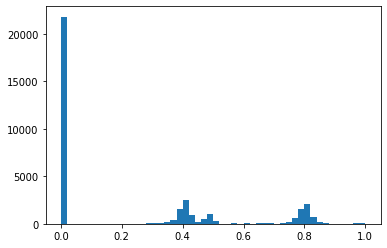

In [25]:
plt.hist(train_reg_df['toxicity'], bins=50);

In [27]:
CLS_LIST = [
    'antagonize',
    'condescending',
    'dismissive',
    'generalisation',
    'generalisation_unfair',
    'healthy',
    'hostile',
    'sarcastic',
]
train_cls_df = orig_df[['comment', *CLS_LIST]]

In [28]:
train_reg_df.to_csv(DATASET_DIR / 'train_reg.csv', index=False)
train_cls_df.to_csv(DATASET_DIR / 'train_cls.csv', index=False)

In [33]:
!cp /home/jovyan/jigsaw-toxic/data/jigsaw-toxic-severity-rating/valid.csv $DATASET_DIR/valid.csv